Histogram of an Image

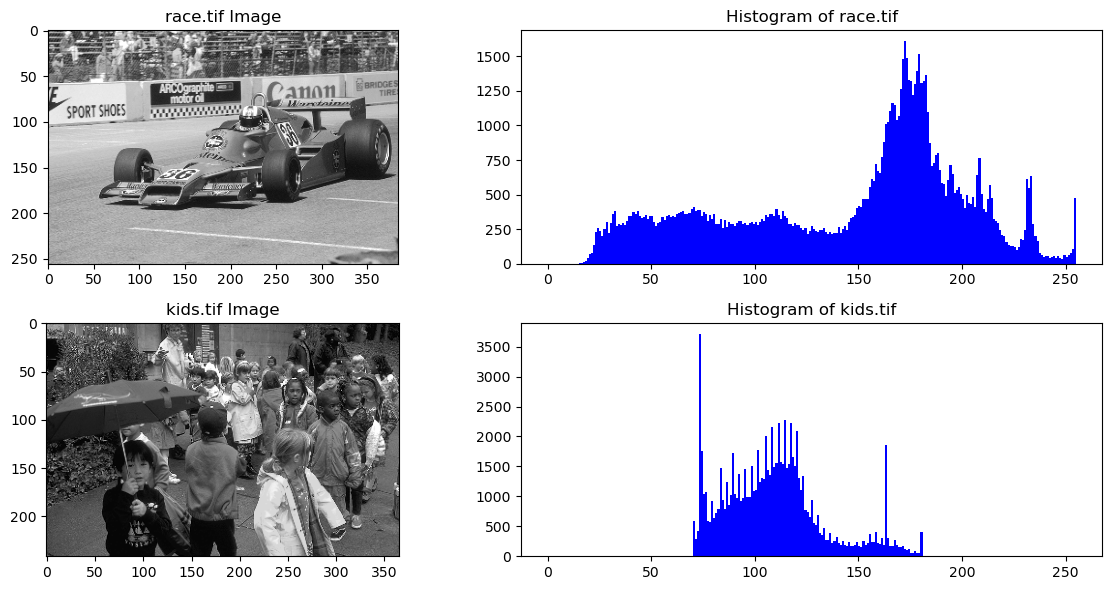

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load images
race_image = Image.open("race.tif")
kids_image = Image.open("kids.tif")

# Convert images to numpy arrays
race_array = np.array(race_image)
kids_array = np.array(kids_image)

# Display histograms
plt.figure(figsize=(12, 6))

# Plot histogram for race.tif
plt.subplot(2, 2, 1)
plt.imshow(race_array, cmap='gray')
plt.title("race.tif Image")
plt.subplot(2, 2, 2)
plt.hist(race_array.flatten(), bins=np.linspace(0, 255, 256), color='blue')
plt.title("Histogram of race.tif")

# Plot histogram for kids.tif
plt.subplot(2, 2, 3)
plt.imshow(kids_array, cmap='gray')
plt.title("kids.tif Image")
plt.subplot(2, 2, 4)
plt.hist(kids_array.flatten(), bins=np.linspace(0, 255, 256), color='blue')
plt.title("Histogram of kids.tif")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


2. Histogram Equalization

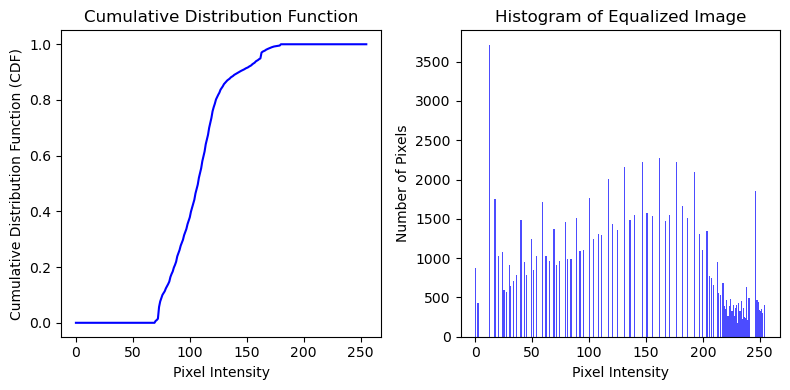

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def equalize(X):
    # Compute histogram
    h, bins = np.histogram(X, bins=256, range=[0, 255])

    # Cumulative sum of histogram
    Y = np.cumsum(h) / np.sum(h)

    # Normalize values to [0, 1]
    Ymax = Y[X.max()]
    Ymin = Y[X.min()]

    Z = np.uint8(255 * ((Y[X] - Ymin) / (Ymax - Ymin)))

    plt.figure(figsize=(8, 4))
    
    # Display CDF
    plt.subplot(1, 2, 1)
    plt.plot(range(256), Y, color='blue')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Cumulative Distribution Function (CDF)')
    plt.title('Cumulative Distribution Function')

    # Display histogram of equalized image
    plt.subplot(1, 2, 2)
    plt.hist(Z.flatten(), bins=256, range=[0, 255], color='blue', alpha=0.7)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Number of Pixels')
    plt.title('Histogram of Equalized Image')
    

    plt.tight_layout()
    plt.show()

    return Z


kids_image = Image.open("kids.tif")

kids_array = np.array(kids_image)
Image.fromarray(equalize(kids_array).astype('uint8')).save("pdsp.png")


Contrast scretching

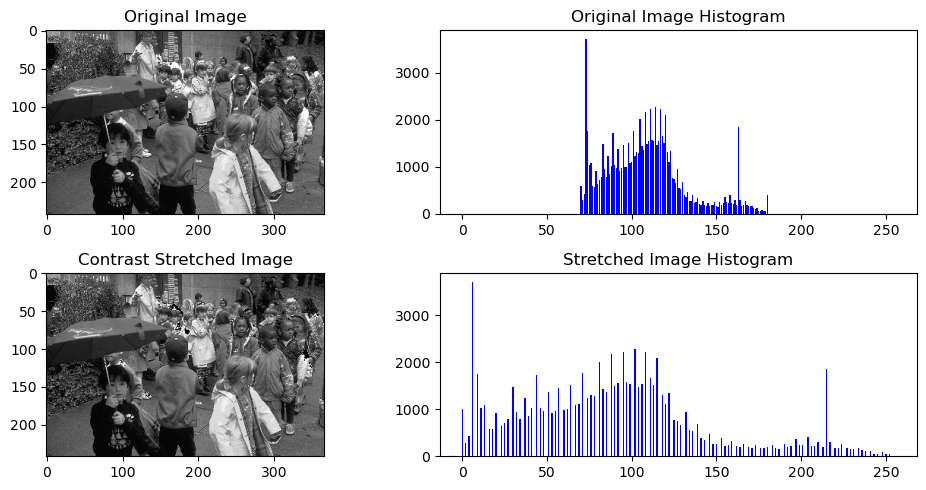

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "kids.tif"  # Replace with the actual path to kids.tif
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

# Compute and plot the histogram of the original image
plt.subplot(2, 2, 2)
hist_original = cv2.calcHist([original_image], [0], None, [256], [0, 256])
plt.bar(range(256), hist_original.flatten(), color='blue')
plt.title('Original Image Histogram')

# Define stretch function
def stretch(input, T1, T2):
    rol, col = input.shape
    output = np.zeros((rol, col), dtype=np.uint8)

    for i in range(rol):
        for j in range(col):
            if input[i, j] > T2:
                output[i, j] = 255
            elif T1 < input[i, j] < T2:
                output[i, j] = np.uint8((input[i, j] - T1) * (255 / (T2 - T1)))

    return output


T1= np.argmax(hist_original > 0)
T2= 255 - np.argmax(hist_original[::-1] > 0)
contrast_stretched_image = stretch(original_image, T1, T2)
Image.fromarray(contrast_stretched_image.astype('uint8')).save("pp.png")

# Display the contrast-stretched image
plt.subplot(2, 2, 3)
plt.imshow(contrast_stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')

# Compute and plot the histogram of the stretched image
plt.subplot(2, 2, 4)
hist_stretched = cv2.calcHist([contrast_stretched_image], [0], None, [256], [0, 256])
plt.bar(range(256), hist_stretched.flatten(), color='blue')
plt.title('Stretched Image Histogram')

# Show the plots
plt.tight_layout()
plt.show()



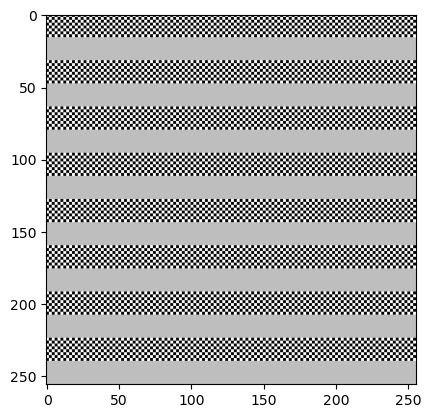

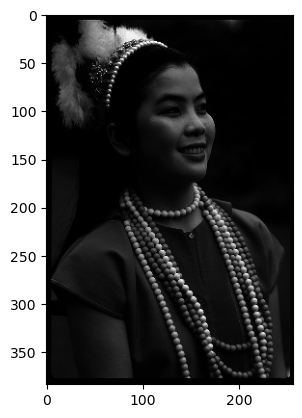

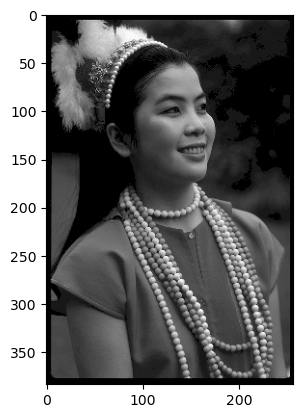

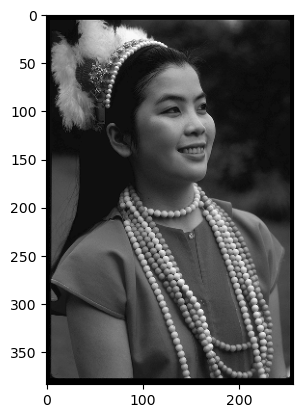

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import matlib as mb


def GenerateArraypattern(level):
    xgray=level*np.ones((16,256))
    funit=np.array([[255, 255, 0, 0],[255, 255, 0 , 0], [0 , 0, 255, 255],[ 0, 0, 255, 255]])
    xcheck=mb.repmat(funit, 4, 4*16)
    xunit=np.vstack((xcheck, xgray))
    x=mb.repmat(xunit, 8, 1)

    plt.figure(1)
    plt.imshow(x, cmap='gray')
    plt.axis('image')
    plt.show()

GenerateArraypattern(190)

plt.figure(2)
plt.imshow(np.array(Image.open('linear.tif')), cmap='gray')
plt.show()

linear = np.array(Image.open('linear.tif'))
corLinearImg = 255 * (np.array(linear) / 255) ** (1 / 2.3557)

plt.figure(3)
plt.imshow(np.uint8(corLinearImg), cmap='gray')
plt.show()

gamma = np.array(Image.open('gamma15.tif'))
corGammaImg = 255 * (np.array(gamma) / 255) ** (1.5 / 2.3557)

plt.figure(4)
plt.imshow(np.uint8(corGammaImg), cmap='gray')
plt.show()

